In [3]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
plt.style.use('dark_background')
import plotly.express as px

1. Прочитайте CSV файл (використовуйте метод read_csv): 

In [3]:
df = pd.read_csv('C:/Users/tuf/Downloads/Global YouTube Statistics.csv',encoding = 'windows-1251')

2. Виведіть перші п'ять рядків (використовується метод head)

In [4]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


3. Виведіть розміри датасету (використовуйте метод shape):

In [5]:
df.shape

(995, 28)

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків  у кожному зі стовпців (використовуйте методи isna та sum). 
Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий. 

In [6]:
df.isna().mean()*100 # дивимось у выдсотках на пропущєнні значення
# найбільшим із пропусків є колонка "subscribers_for_last_30_days" - 33 відсотка

rank                                        0.000000
Youtuber                                    0.000000
subscribers                                 0.000000
video views                                 0.000000
category                                    4.623116
Title                                       0.000000
uploads                                     0.000000
Country                                    12.261307
Abbreviation                               12.261307
channel_type                                3.015075
video_views_rank                            0.100503
country_rank                               11.658291
channel_type_rank                           3.316583
video_views_for_the_last_30_days            5.628141
lowest_monthly_earnings                     0.000000
highest_monthly_earnings                    0.000000
lowest_yearly_earnings                      0.000000
highest_yearly_earnings                     0.000000
subscribers_for_last_30_days               33.

In [7]:
df.columns = df.columns.str.replace(' ','_') 
#замінемо пробіли на "snake case" для того щоб зручно визивати колонки 

In [8]:
avg_nan = df.columns[df.isna().any()]

In [9]:
avg_nan

Index(['category', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross_tertiary_education_enrollment_(%)', 'Population',
       'Unemployment_rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

 Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float.

In [262]:
df.fillna(np.mean,inplace=True)

In [263]:
df.isna().mean()

rank                                       0.0
Youtuber                                   0.0
subscribers                                0.0
video_views                                0.0
category                                   0.0
Title                                      0.0
uploads                                    0.0
Country                                    0.0
Abbreviation                               0.0
channel_type                               0.0
video_views_rank                           0.0
country_rank                               0.0
channel_type_rank                          0.0
video_views_for_the_last_30_days           0.0
lowest_monthly_earnings                    0.0
highest_monthly_earnings                   0.0
lowest_yearly_earnings                     0.0
highest_yearly_earnings                    0.0
subscribers_for_last_30_days               0.0
created_year                               0.0
created_month                              0.0
created_date 

In [264]:
df.rename(columns=lambda x: x.lower(), inplace=True) #для зручності переведемо всі колонки до нижнього регістру

Перевірте, скільки унікальних країн представлено у колонці "Country" 

In [265]:
df.country.unique()

array(['India', 'United States', <function mean at 0x0000025E12533C40>,
       'Japan', 'Russia', 'South Korea', 'United Kingdom', 'Canada',
       'Brazil', 'Argentina', 'Chile', 'Cuba', 'El Salvador', 'Pakistan',
       'Philippines', 'Thailand', 'Colombia', 'Barbados', 'Mexico',
       'United Arab Emirates', 'Spain', 'Saudi Arabia', 'Indonesia',
       'Turkey', 'Venezuela', 'Kuwait', 'Jordan', 'Netherlands',
       'Singapore', 'Australia', 'Italy', 'Germany', 'France', 'Sweden',
       'Afghanistan', 'Ukraine', 'Latvia', 'Switzerland', 'Vietnam',
       'Malaysia', 'China', 'Iraq', 'Egypt', 'Andorra', 'Ecuador',
       'Morocco', 'Peru', 'Bangladesh', 'Finland', 'Samoa'], dtype=object)

In [266]:
df.country.nunique()

50

Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'): 

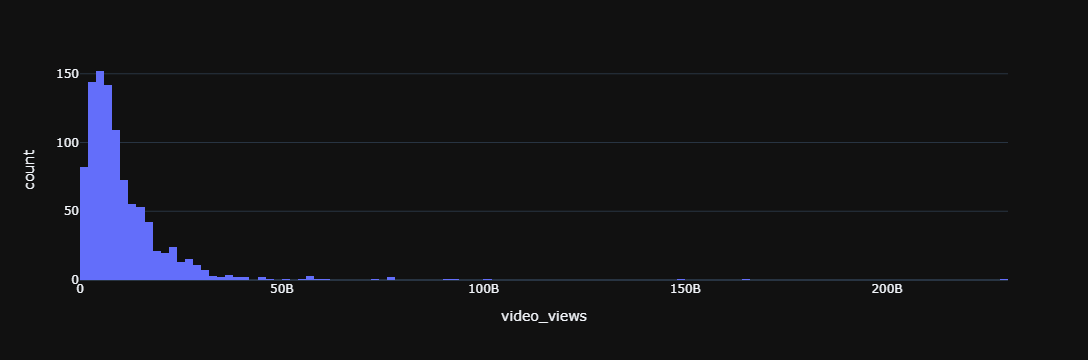

In [267]:
df  = df
fig = px.histogram(df, x="video_views")
fig.update_layout(template='plotly_dark')
fig.show()
# на графіку ми можемо побачити що основна гістограма засереджена в лівій частині, 
# а також присутній " жирний хвіст "- це ті великі перегляди які є, але їх мало.

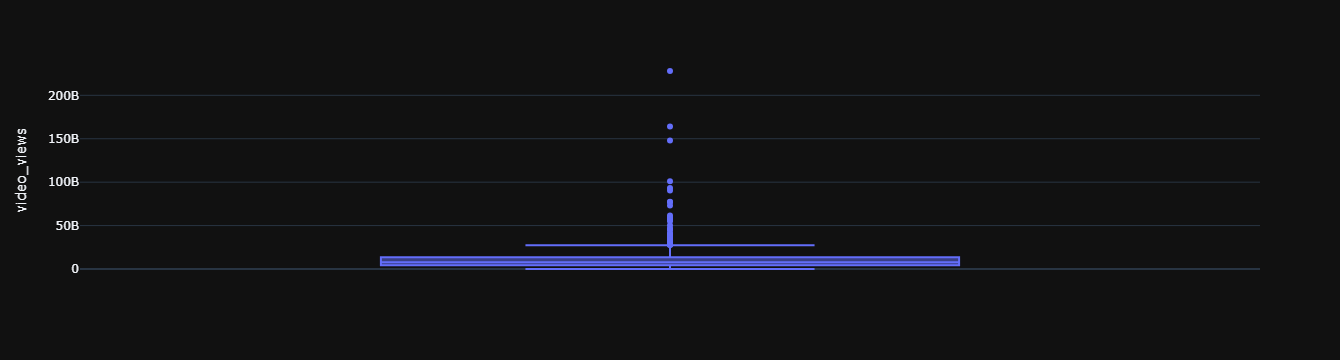

<Figure size 1000x1000 with 0 Axes>

In [268]:
# Саме на статистику графіку можно подивитися на box-plot,
# як ми можемо побачити що графік "бокс-плот" негарний та в нас є викиди - це ті самі відео с дуже великими переглядами 
# як приклад с такою проблемою є середній дохід всіх меешканців землі, та існують такі виброси коли люди-міліардери зі своїм доходом можуть
# вплинути на всю ситуацію по сердньому значенню
plt.figure(figsize=(10, 10))
df  = df
fig = px.box(df, y="video_views")
fig.update_layout(template='plotly_dark')
fig.show()

In [269]:
#df.video_views.hist()

In [10]:
# Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean) 

In [270]:
df.video_views.agg(['max','min','mean']).to_frame()

,video_views
max,2.280000e+11
min,0.000000e+00
mean,1.103954e+10


In [271]:
df.video_views.agg(['max','min','median']).to_frame() 
# тепер можемо побачити альтернативу середньому - це медіана. B нас є дуже великі викіди тому середнє дуже виходить велике

,video_views
max,2.280000e+11
min,0.000000e+00
median,7.760820e+09


In [11]:
1.103954e+10 - 7.760820e+09 # це є різниця між середнім та медіаною. Через це може здатися, що середня кільеість переглядів є така велика.

3278720000.0

Знайдіть країну, де найбільше відео було завантажено на YouTube 

In [273]:
top_countries = df.groupby('country').agg({'uploads':'sum'}).sort_values('uploads',ascending=False)

In [274]:
top_countries.head()

,uploads
country,
India,3728212
United States,1299609
Thailand,858953
Philippines,838543
Indonesia,678321


In [275]:
top_countries

,uploads
country,
India,3728212
United States,1299609
Thailand,858953
Philippines,838543
Indonesia,678321
Pakistan,507947
Ukraine,220128
United Arab Emirates,188422
Brazil,168178


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States'),
  Text(2, 0, '<function mean at 0x0000025E12533C40>'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'Russia'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Brazil'),
  Text(9, 0, 'Argentina'),
  Text(10, 0, 'Chile'),
  Text(11, 0, 'Cuba'),
  Text(12, 0, 'El Salvador'),
  Text(13, 0, 'Pakistan'),
  Text(14, 0, 'Philippines'),
  Text(15, 0, 'Thailand'),
  Text(16, 0, 'Colombia'),
  Text(17, 0, 'Barbados'),
  Text(18, 0, 'Mexico'),
  Text(19, 0, 'United Arab Emirates'),
  Text(20, 0, 'Spain'),
  Text(21, 0, 'Saudi Arabia'),
  Text(22, 0, 'Indonesia'),
  Text(23, 0, 'Turkey'),
  Text(24, 0, 'Venezuela'),
  Text(25, 0, 'Kuwait'),
  Text(26, 0, 'Jordan'),
  Text(27, 0, 'Ne

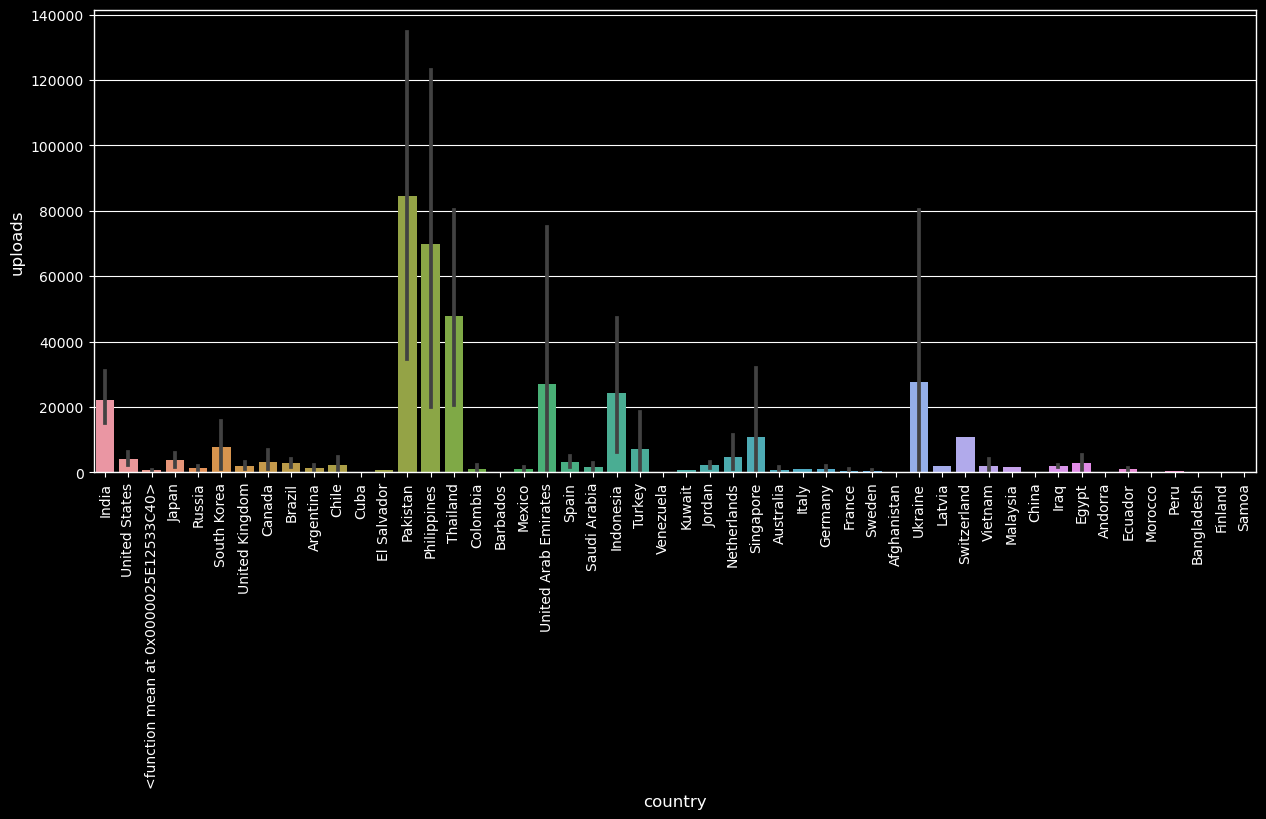

In [276]:
plt.figure(figsize=(15,6))
sns.barplot(x=df.country,y=df.uploads)
plt.xticks(rotation=90)

Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads

In [288]:
df.groupby('title').agg({'uploads':'sum'}).sort_values('uploads',ascending=False)

,uploads
title,
ABP NEWS,301308
GMA Integrated News,296272
TV9 Bharatvarsh,293516
Aaj Tak,283775
IndiaTV,273255
...,...
TheGameTheorists,0
Homem Aranha player,0
Live,0


Скачайте датасет  Amazon Top 50 Bestselling Books 2009 – 2019, що знаходиться  за посиланням 
Набір даних із 50 найбільш продаваних книг Amazon з 2009 по 2019 рік. Містить 550 книг, дані були розділені на художню літературу та нон-фікшн за допомогою Goodreads. 

# Завдання 
Прочитайте csv файл (метод read_csv) 

Виведіть перші 10 рядків (метод head) 

Виведіть розміри датасету (метод shape) 

Питання: Про скільки книг зберігає дані датасет? 

Для кожної з книг доступні 7 колонок.  

Name - назва книги 

Author - автор 

User Rating - рейтинг (за 5-бальною шкалою) 

Reviews - кількість відгуків 

Price - ціна (у доларах станом на 2020 рік) 

Year - рік, коли книга потрапила до рейтингу Топ-50 

Genre - жанр 

In [16]:
df = pd.read_excel('C:/Users/tuf/Downloads/bestsellers with categories.xlsx')

In [5]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
df.shape

(550, 7)

Питання: Про скільки книг зберігає дані датасет? 

In [11]:
df.Name.nunique() #- якщо взяти книги в цілому, то 550, якщо брати тільки унікальні значення, 351 книга 

351

In [21]:
df[df.Name.duplicated()] #- таким чином ми можемо побачити всі дублікати

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Змініть назви всіх колонок: назва з маленької букви, без пробілів через підкреслення. 

In [49]:
columns = df.columns.str.replace(' ','_').str.lower()

In [50]:
columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [52]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [54]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Вивести кількість пропусків у кожному стовпчику. 

In [57]:
df.isna().mean() #дивимося на числа в долях по пропущеним значенням, як ми моежемо побачити що не маємо пропущенних значень №

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64

Питання : Які є унікальні жанри? 

In [58]:
df.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Визначте максимальну, мінімальну, медіанну ціну за допомогою методів  max, min, mean, median 

In [69]:
stat_books = df.price.agg(['sum','min','max','mean','median']).to_frame()

In [71]:
stat_books = stat_books.reset_index().rename(columns = {'index':'aggfunc'})

 Питання: Який рейтинг у датасеті найвищий?  

Питання: Скільки книг мають такий рейтинг?  

Питання: Яка книга має найбільше відгуків?  

In [75]:
df.user_rating.value_counts()

user_rating
4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: count, dtype: int64

In [85]:
df.user_rating.value_counts()

user_rating
4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: count, dtype: int64

In [89]:
df.groupby('name').agg({'reviews':'sum'}).sort_values('reviews', ascending=False)

,reviews
name,
The Fault in Our Stars,201928
"Oh, the Places You'll Go!",174672
Gone Girl,171813
The Girl on the Train,158892
"Unbroken: A World War II Story of Survival, Resilience, and Redemption",148365
...,...
The Daily Show with Jon Stewart Presents Earth (The Book): A Visitor's Guide to the Human Race,440
True Compass: A Memoir,438
George Washington's Sacred Fire,408


In [101]:
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Питання: З тих книг, що потрапили до Топ-50 у 2010 році, яка книга найдорожча ? 


In [108]:
df.query('year==2010').sort_values('user_rating',ascending=False).head(50).price.max()
#за цією умовою ми не просто сортуємо за ціною, нам спочатку треба подивитись топ по оцінrам, потім вже відсортуватись

46

In [112]:
df.query('year==2010 and genre=="Fiction"').genre.agg(['count']).head(50)

count    20
Name: genre, dtype: int64

In [119]:
df['year'] = pd.to_datetime(df.year, format = '%Y') #для того щоб відповісти на наступне завдання, нам потрібно перевести рік у тип дати. 

In [120]:
df.dtypes

name                   object
author                 object
user_rating           float64
reviews                 int64
price                   int64
year           datetime64[ns]
genre                  object
dtype: object

In [123]:
start_date =  pd.to_datetime('2010-01-01')
end_date   =  pd.to_datetime('2011-01-01')

Питання : Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або метод isin)?  


In [126]:
df[df.year.between(start_date, end_date)].user_rating.value_counts()
#В-дь = 1

user_rating
4.7    24
4.6    21
4.8    14
4.4    13
4.5    12
4.3     7
4.2     4
4.1     2
4.0     2
4.9     1
Name: count, dtype: int64

Вивести максимальну і  мінімальну ціну для жанру Fiction I NonFiction
(за допомогою методів  groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Використовуйте тількі потрібні вам стовпці. 

In [129]:
df.groupby('genre').price.agg(['max','min'])

,max,min
genre,,
Fiction,82,0
Non Fiction,105,0


# ВЛАСНА ДОРОБКА

Давайте для прикладу візьмемо наш датасет про книги. Зверху, на мою думку ми провели базовий EDA котрий може допомогти поверхнево оцінити дані: пропущенні значення,
розмір, заміна значень, використовування базових функцій, виявили різницю між медіаною та середнім при великих даних. Тепер давайте уявимо картину що ці дані прийшли 
шляхом  експеременту. Припустимо, що ми маємо свій інтернет з продажу книг, де в нас продавалися тільки книги жанру Non Fiction тепер ми вирішили додати
жанр Fiction. В нас з'явилася статистика щодо нашого досліду, і ми хочемо вияснити чи кращим був наш магазин коли був один жанр чи ні. І ми показали 57% користувачам сайт з старими функціями. А іншим 43% з новим оновленням 
Сформулюємо гіпотезу H0 : припустимо ніяких відмінностей між групами немає. H1 :різниця між групами є 

In [ ]:
#отношения между ценами и оценками например и взаимосвязь между рейтингом и ценой..

In [18]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [45]:
df.groupby(['year','genre']).author.agg('count').to_frame()

author
year genre              
2009 Fiction          24
     Non Fiction      26
2010 Fiction          20
     Non Fiction      30
2011 Fiction          21
     Non Fiction      29
2012 Fiction          21
     Non Fiction      29
2013 Fiction          24
     Non Fiction      26
2014 Fiction          29
     Non Fiction      21
2015 Fiction          17
     Non Fiction      33
2016 Fiction          19
     Non Fiction      31
2017 Fiction          24
     Non Fiction      26
2018 Fiction          21
     Non Fiction      29
2019 Fiction          20
     Non Fiction      30

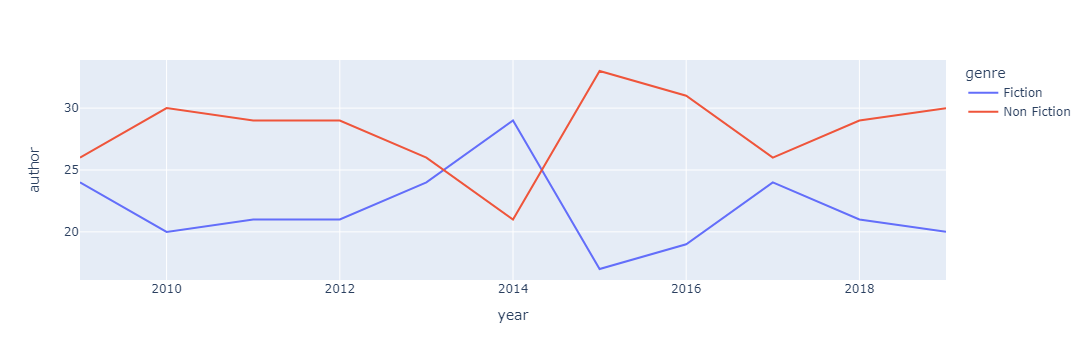

In [42]:
import plotly.express as px

qw = df.groupby(['year','genre'],as_index=False).author.agg('count')
fig = px.line(qw, x="year", y="author", color='genre')
fig.show() 
# тут ми подивилися на популярність наших жанрів протягом наданих років. В даному випадку ми побачили, що дані абсолютно симетричні
# через це я вирішив перевірити розподілення інших  метрик
# далі за цим шляхом я вирішив подивитись на розподілення інших метрик, і ймовірність їх штучного генерування

<Axes: >

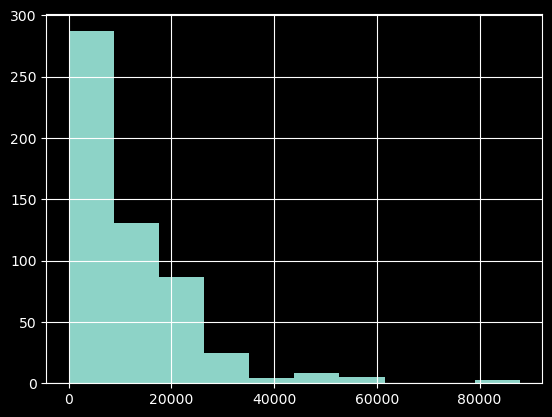

In [61]:
df.reviews.hist()

<Axes: >

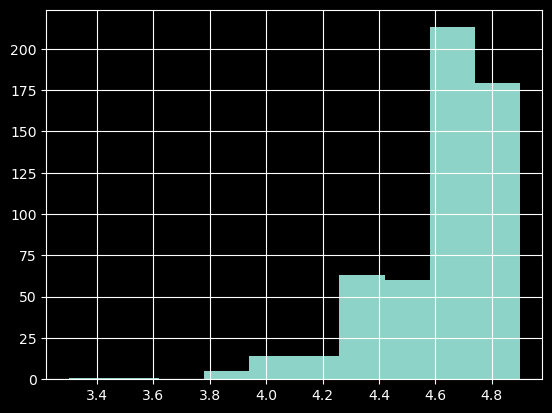

In [63]:
df.user_rating.hist()

In [ ]:
# Вирішив подивитися на розподілення наших змінних. Мені це нагадує ніби на логнормальне розподілення. Перевірив це за допомогою графіку qq-plot

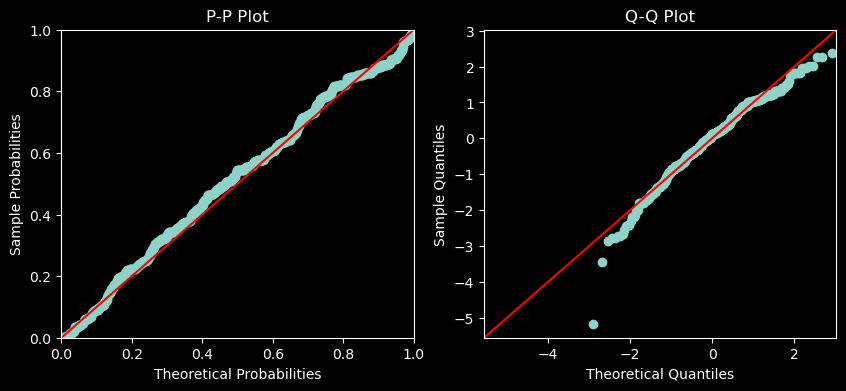

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
probplot = sm.ProbPlot(np.log(df.reviews), fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot')
plt.show()
# метрика з переглядами 

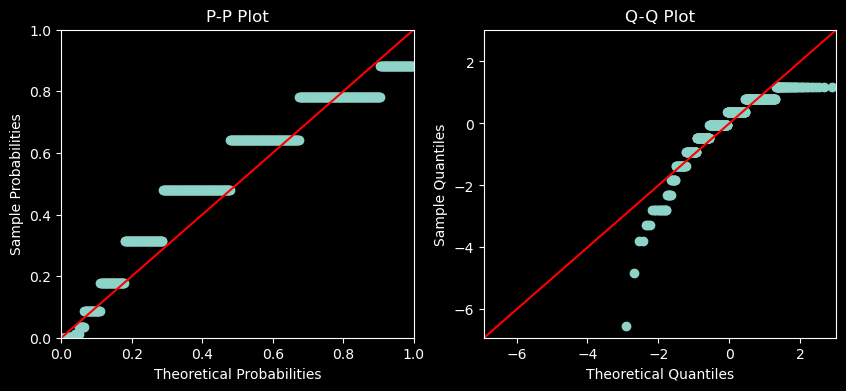

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
probplot = sm.ProbPlot(np.log(df.user_rating), fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot')
plt.show()
# метрика з рейтингом користувачів

In [1]:
lognormal_data_sorted = np.sort(df.price)

# Генерируем теоретические квантили для логнормального распределения
theoretical_quantiles = stats.lognorm.ppf(np.linspace(0.01, 0.99, num_samples), s=sigma, loc=0, scale=np.exp(mu))

# Строим QQ-график
plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles, lognormal_data_sorted, alpha=0.5)
plt.xlabel('Теоретические квантили')
plt.ylabel('Отсортированные данные')
plt.title('QQ-график для логнормального распределения')
plt.show()
# для ціни 

NameError: name 'np' is not defined

<Axes: >

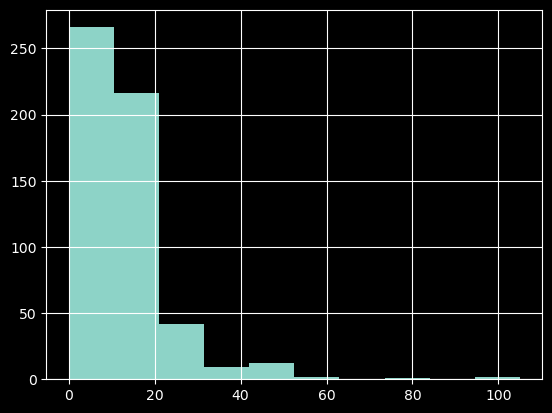

In [89]:
df.price.hist() 
#ми бачимо якщо перегляди можуть бути близькими до логнормального, за рахунок того що є "жирний хвіст" з ціною хвіст також є,але не великий
#тому воно не є цілком схожим на логнормальне розподілення

In [90]:
df.price

0       8
1      22
2      15
3       6
4      12
       ..
545     8
546     8
547     8
548     8
549     8
Name: price, Length: 550, dtype: int64

In [30]:
df.groupby(['year','genre']).author.agg('count').to_frame()

author
year genre              
2009 Fiction          24
     Non Fiction      26
2010 Fiction          20
     Non Fiction      30
2011 Fiction          21
     Non Fiction      29
2012 Fiction          21
     Non Fiction      29
2013 Fiction          24
     Non Fiction      26
2014 Fiction          29
     Non Fiction      21
2015 Fiction          17
     Non Fiction      33
2016 Fiction          19
     Non Fiction      31
2017 Fiction          24
     Non Fiction      26
2018 Fiction          21
     Non Fiction      29
2019 Fiction          20
     Non Fiction      30

Сформулюємо наш датасет на наши даних про книги

Давайте для прикладу візьмемо наш датасет про книги. Зверху, на мою думку ми провели базовий EDA котрий може допомогти поверхнево оцінити дані: пропущенні значення,
розмір, заміна значень, використовування базових функцій, виявили різницю між медіаною та середнім при великих даних. Тепер давайте уявимо картину що ці дані прийшли 
шляхом  експеременту. Припустимо, що ми маємо свій інтернет з продажу книг, де в нас продавалися тільки книги жанру Non Fiction тепер ми вирішили додати
жанр Fiction. В нас з'явилася статистика щодо нашого досліду, і ми хочемо вияснити чи кращим був наш магазин коли був один жанр чи ні. І ми показали 57% користувачам сайт з старими функціями. А іншим 43% з новим оновленням 
Сформулюємо гіпотезу H0 : припустимо ніяких відмінностей між групами немає. H1 :різниця між групами є 

In [109]:
df['year'] = pd.to_datetime(df.year, format = '%Y') 

In [4]:
df = pd.DataFrame({'group' : ['old_landing(A)','new_landing(B)'], 'lead':[2810195, 3764110], 'sale':[4601, 2604]})

In [112]:
df.query('genre=="Non Fiction"').reviews.agg(['sum'])

sum    2810195
Name: reviews, dtype: int64

In [114]:
df.query('genre=="Non Fiction"').price.agg(['sum'])

sum    4601
Name: price, dtype: int64

In [113]:
df.query('genre=="Fiction"').reviews.agg(['sum'])

sum    3764110
Name: reviews, dtype: int64

In [115]:
df.query('genre=="Fiction"').price.agg(['sum'])

sum    2604
Name: price, dtype: int64

In [5]:
df = pd.DataFrame({'group' : ['old_landing(A)','new_landing(B)'], 'lead':[2810195, 3764110], 'sale':[4601, 2604]})

In [8]:
df['cr'] = df.sale/df.lead

### lead - кількість преглядів
### sale - кількість куплених 
### cr   - конверсія кількості куплених книжок від кількості переглядів

In [9]:
df

,group,lead,sale,cr
0,old_landing(A),2810195,4601,0.001637
1,new_landing(B),3764110,2604,0.000692


припустимо що різниці немає згідно з нашою гіпотезою H0

In [11]:
(4601+2604) / (2810195+3764110)  #- це буде наша загальна конверсія#

0.0010959333343980846

In [40]:
np.random.binomial(1,0.0010, size=2810195).mean() #створемо генератор для H0 припустимо що різниці немає.

0.0010237723716681583

In [41]:
np.random.binomial(1,0.0010, size=3764110).mean()
# через наш метод монте карло ми моделюємо дані і бачимо що наша нова функція може бути навіть гірше.
# він дає конверсію менше

0.0009784517455653527

In [118]:
np.random.binomial(1,0.0010, size=2810195).mean() - np.random.binomial(1,0.0010, size=3764110).mean()
#через те, що ми хочемо побачити що перший варіант ( коли був лише один жанр ) краще
#ми віднімаємо перший від другого и дивимося на різницю.Якщо вона додатня, то перший варіант є кращим.

2.0111541974862516e-05

In [ ]:
abs(0.001637 - 0.000692) #- візьмемо наш cr- conversion rate. Обернемо його в модуль. Та подивимося 
#яка ймовірність отримати такі та ще більше відмінності, при умові що наші виборки є однаковими.

In [103]:
from tqdm.notebook import tqdm

In [123]:
np.mean([abs(np.random.binomial(1,0.0010, size=2810195).mean() 
- np.random.binomial(1,0.0010, size=3764110).mean()) >= 0.000945 for _ in tqdm(range(3000))])

  0%|          | 0/3000 [00:00<?, ?it/s]

0.0

як ми бачимо наш P-рівень = 0.0 відсотків. С цього ми можемо зробити висновок та відхилити нову нульову гіпотезу. Прийняти альтернативну
з висновком, що різниця є, між двома проєктами з різними жанрами.

In [121]:
# це нам і довів z-test.Хоча значення трохи інші.
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest([4601,2604],[2810195,3764110])

(36.24614217648426, 1.1429656443952523e-287)